# Challenge Objective

##### For the Maven Rail Challenge, you'll play the role of a BI Developer for National Rail, a company that provides business services to passenger train operators in England, Scotland, and Wales.

##### You've been asked by your manager to create an exploratory dashboard that helps them:

Identify the most popular routes

Determine peak travel times

Analyze revenue from different ticket types & classes

Diagnose on-time performance and contributing factors

In [1]:
import pandas as pd

In [48]:
data = pd.read_csv(r"C:\Users\dell\Downloads\UK+Train+Rides\railway.csv")

In [49]:
data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [7]:
data.shape

(31653, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

## **Question 1**

In [51]:
data[data['Reason for Delay']== 'Signal Failure']

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
26,74462231-5241-46f4-8328,2023-12-31,15:53:46,Online,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01,14:15:00,15:30:00,15:54:00,Delayed,Signal Failure,Yes
154,a3102fe0-5d21-4e37-b5ee,2024-01-02,06:38:39,Online,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-01-02,08:00:00,09:20:00,NaN,Cancelled,Signal Failure,No
171,abbbe382-faca-4289-b9b7,2024-01-02,07:32:42,Station,Contactless,Adult,Standard,Off-Peak,12,Manchester Piccadilly,Nottingham,2024-01-02,09:00:00,10:00:00,10:59:00,Delayed,Signal Failure,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,b896da99-ad3e-4ff3-853c,2024-04-29,20:25:08,Online,Credit Card,NaN,Standard,Advance,8,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaN,Cancelled,Signal Failure,No
31507,3116b006-823f-4bcc-b014,2024-04-29,20:27:18,Station,Credit Card,Adult,Standard,Advance,5,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaN,Cancelled,Signal Failure,No
31508,c149ff64-33cc-4c6c-b7e1,2024-04-29,20:29:08,Online,Credit Card,NaN,Standard,Advance,8,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaN,Cancelled,Signal Failure,No
31638,471bf3a2-aef7-4165-b493,2024-04-30,17:10:04,Station,Debit Card,Adult,Standard,Anytime,11,London St Pancras,Birmingham New Street,2024-04-30,18:45:00,20:05:00,NaN,Cancelled,Signal Failure,No


In [8]:
popular_routes = data.groupby(['Departure Station' ,'Arrival Destination']).size().reset_index(name='Counts')

In [21]:
top_10 = popular_routes.sort_values(by = 'Counts' ,ascending = False)[:10]
top_10

,Departure Station,Arrival Destination,Counts
40,Manchester Piccadilly,Liverpool Lime Street,4628
24,London Euston,Birmingham New Street,4209
30,London Kings Cross,York,3922
35,London Paddington,Reading,3873
36,London St Pancras,Birmingham New Street,3471
22,Liverpool Lime Street,Manchester Piccadilly,3002
19,Liverpool Lime Street,London Euston,1097
25,London Euston,Manchester Piccadilly,712
6,Birmingham New Street,London St Pancras,702
34,London Paddington,Oxford,485


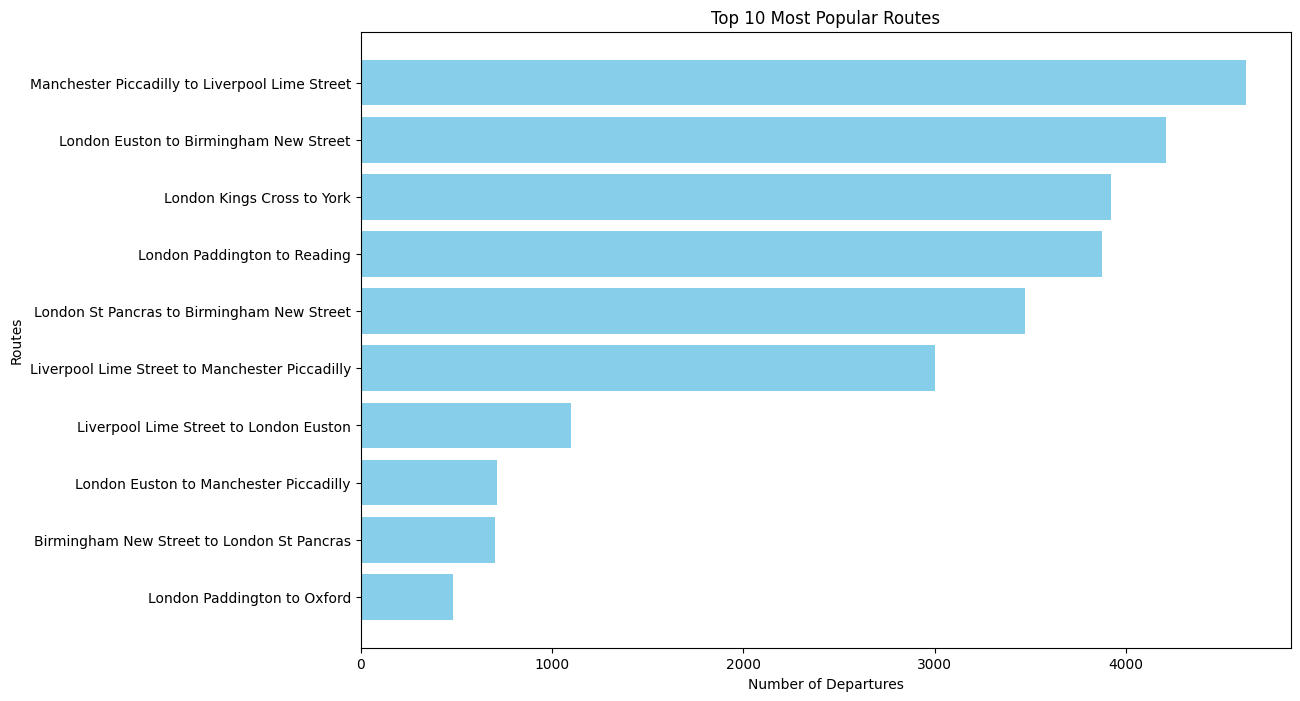

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
top_10['Route'] = top_10['Departure Station'] + ' to ' + top_10['Arrival Destination']

# Plotting the top 10 routes
plt.figure(figsize=(12, 8))
plt.barh(top_10['Route'], top_10['Counts'], color='skyblue')
plt.xlabel('Number of Departures')
plt.ylabel('Routes')
plt.title('Top 10 Most Popular Routes')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

In [23]:
top_10

,Departure Station,Arrival Destination,Counts,Route
40,Manchester Piccadilly,Liverpool Lime Street,4628,Manchester Piccadilly to Liverpool Lime Street
24,London Euston,Birmingham New Street,4209,London Euston to Birmingham New Street
30,London Kings Cross,York,3922,London Kings Cross to York
35,London Paddington,Reading,3873,London Paddington to Reading
36,London St Pancras,Birmingham New Street,3471,London St Pancras to Birmingham New Street
22,Liverpool Lime Street,Manchester Piccadilly,3002,Liverpool Lime Street to Manchester Piccadilly
19,Liverpool Lime Street,London Euston,1097,Liverpool Lime Street to London Euston
25,London Euston,Manchester Piccadilly,712,London Euston to Manchester Piccadilly
6,Birmingham New Street,London St Pancras,702,Birmingham New Street to London St Pancras
34,London Paddington,Oxford,485,London Paddington to Oxford


## Determine peak travel times

##### Now pare time 

In [24]:
data['Departure Time']

0        11:00:00
1        09:45:00
2        18:15:00
3        21:30:00
4        16:45:00
           ...   
31648    20:00:00
31649    20:15:00
31650    20:15:00
31651    21:15:00
31652    21:30:00
Name: Departure Time, Length: 31653, dtype: object

In [25]:
data['Departure Time'] = pd.to_datetime(data['Departure Time'] , format ='%H:%M:%S')

In [47]:
 data['Departure Hour'] = data['Departure Time'].dt.hour
 data['Departure Hour']

0        11
1         9
2        18
3        21
4        16
         ..
31648    20
31649    20
31650    20
31651    21
31652    21
Name: Departure Hour, Length: 31653, dtype: int32

In [28]:
# Group by the 'Departure Hour' and count the number of occurrences
peak_travel_times = data.groupby('Departure Hour').size().reset_index(name='Counts')

# Sort the hours by the count in descending order to get the peak travel times
peak_travel_times = peak_travel_times.sort_values(by='Counts', ascending=False)[:10]

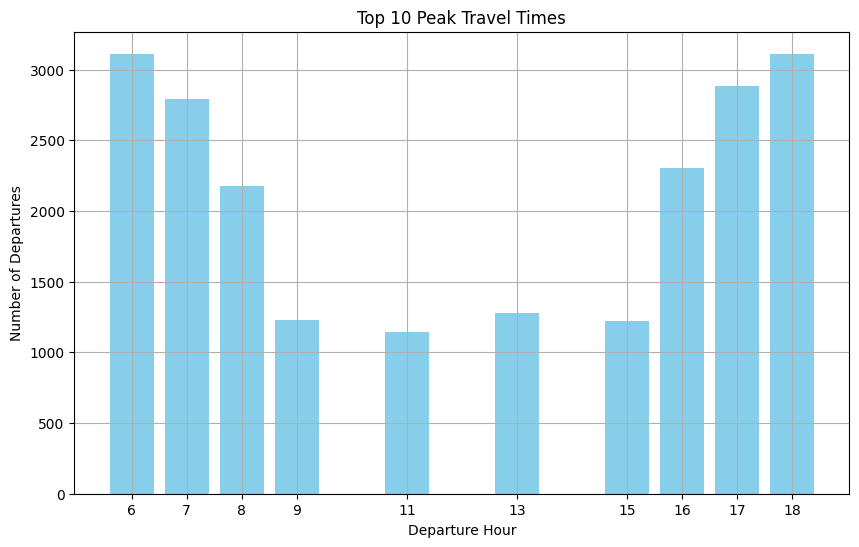

In [32]:
# Plotting the top 10 peak travel times
plt.figure(figsize=(10, 6))
plt.bar(peak_travel_times['Departure Hour'], peak_travel_times['Counts'], color='skyblue')
plt.xlabel('Departure Hour')
plt.ylabel('Number of Departures')
plt.title('Top 10 Peak Travel Times')
plt.xticks(peak_travel_times['Departure Hour'])
plt.grid(True)
plt.show()

### Analyze revenue from different ticket types & classes

In [36]:
# Group by 'Ticket Type' and 'Ticket Class' and calculate the total revenue
revenue_analysis = data.groupby(['Ticket Type', 'Ticket Class'])['Price'].sum().reset_index()

# Sort the results by revenue in descending order
revenue_analysis = revenue_analysis.sort_values(by='Price', ascending=False)
revenue_analysis 

,Ticket Type,Ticket Class,Price
1,Advance,Standard,242388
5,Off-Peak,Standard,178666
3,Anytime,Standard,171468
0,Advance,First Class,66886
4,Off-Peak,First Class,44672
2,Anytime,First Class,37841


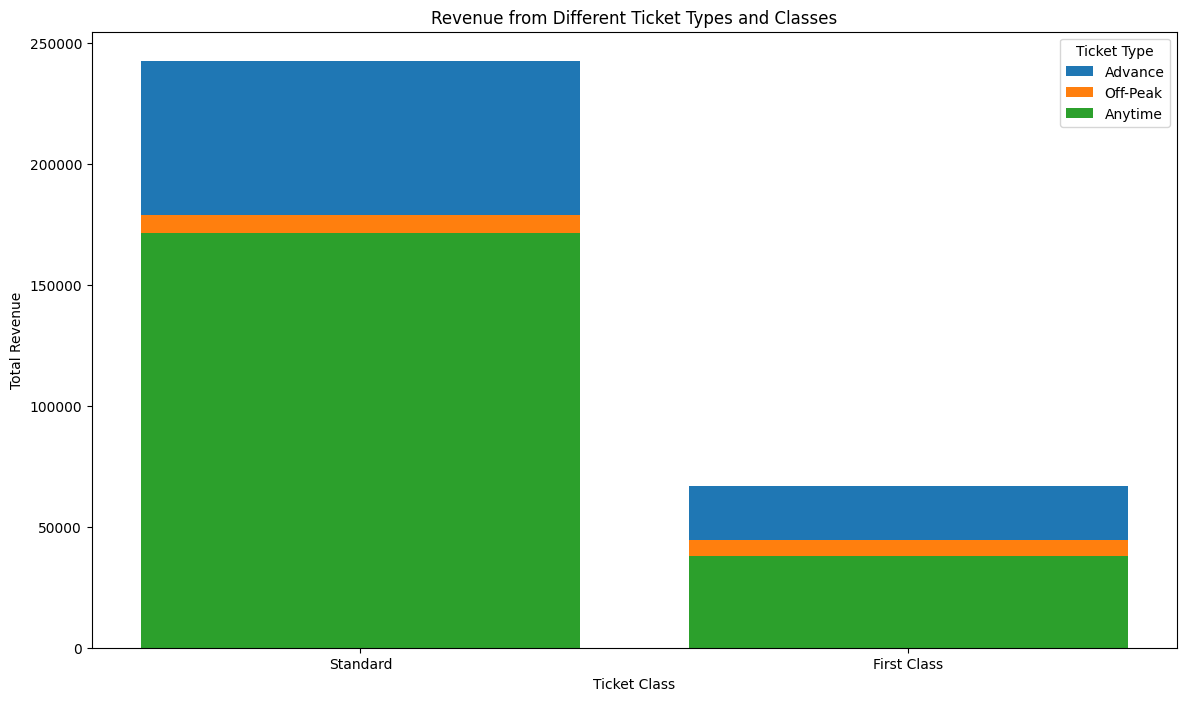

In [34]:
plt.figure(figsize=(14, 8))
for ticket_type in revenue_analysis['Ticket Type'].unique():
    subset = revenue_analysis[revenue_analysis['Ticket Type'] == ticket_type]
    plt.bar(subset['Ticket Class'], subset['Price'], label=ticket_type)

plt.xlabel('Ticket Class')
plt.ylabel('Total Revenue')
plt.title('Revenue from Different Ticket Types and Classes')
plt.legend(title='Ticket Type')
plt.show()

## Diagnose on-time performance and contributing factors

In [39]:
data['Reason for Delay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 31653 entries, 0 to 31652
Series name: Reason for Delay
Non-Null Count  Dtype 
--------------  ----- 
4172 non-null   object
dtypes: object(1)
memory usage: 247.4+ KB


### Calculate On-Time Performance

In [41]:
on_time_performance = data['Journey Status'].value_counts(normalize=True) * 100
print("On-Time Performance:")
print(on_time_performance)

On-Time Performance:
Journey Status
On Time      86.819575
Delayed       7.241020
Cancelled     5.939405
Name: proportion, dtype: float64


#### Analyze Reasons for Delay

In [42]:
# Filter for delayed journeys
delayed_journeys = data[data['Journey Status'] != 'On Time']

# Analyze the reasons for delay
delay_reasons = delayed_journeys['Reason for Delay'].value_counts()
print("Reasons for Delay:")
print(delay_reasons)


Reasons for Delay:
Reason for Delay
Weather               995
Technical Issue       707
Signal Failure        523
Signal failure        447
Staffing              410
Staff Shortage        399
Weather Conditions    377
Traffic               314
Name: count, dtype: int64


#### Identify Contributing Factors

In [43]:
# Convert the 'Departure Time' column to datetime format to extract the hour
data['Departure Time'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S')

# Extract the hour from the 'Departure Time' column
data['Departure Hour'] = data['Departure Time'].dt.hour

# Group by 'Departure Hour' and 'Journey Status' to analyze delays by time of day
delays_by_hour = data.groupby(['Departure Hour', 'Journey Status']).size().unstack(fill_value=0)
print("Delays by Time of Day:")
print(delays_by_hour)


Delays by Time of Day:
Journey Status  Cancelled  Delayed  On Time
Departure Hour                             
0                      49       17      787
1                      23       14      607
2                      64        0      878
3                      11      125      407
4                      46       16      979
5                      22       37      666
6                     187       74     2851
7                     254       15     2526
8                     148      728     1303
9                      45      221      964
10                     17        0      508
11                     56      300      787
12                     46        0      727
13                     63        0     1213
14                     42       15      798
15                     91      143      986
16                    104      206     1991
17                    179      381     2328
18                    311        0     2802
19                     12        0      426
20       

#### Contributing Factor: Day of the Week

In [44]:
# Convert the 'Date of Journey' column to datetime format to extract the day of the week
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'])

# Extract the day of the week from the 'Date of Journey' column
data['Day of Week'] = data['Date of Journey'].dt.day_name()

# Group by 'Day of Week' and 'Journey Status' to analyze delays by day of the week
delays_by_day = data.groupby(['Day of Week', 'Journey Status']).size().unstack(fill_value=0)
print("Delays by Day of the Week:")
print(delays_by_day)


Delays by Day of the Week:
Journey Status  Cancelled  Delayed  On Time
Day of Week                                
Friday                211      308     3832
Monday                255      316     3865
Saturday              290      292     3825
Sunday                297      302     3981
Thursday              242      388     3950
Tuesday               296      350     3961
Wednesday             289      336     4067


#### Contributing Factor: Departure Stations

In [45]:
# Group by 'Departure Station' and 'Journey Status' to analyze delays by departure station
delays_by_station = data.groupby(['Departure Station', 'Journey Status']).size().unstack(fill_value=0)
print("Delays by Departure Station:")
print(delays_by_station)


Delays by Departure Station:
Journey Status         Cancelled  Delayed  On Time
Departure Station                                 
Birmingham New Street        128      140     1868
Bristol Temple Meads           0        0       16
Edinburgh Waverley             0       51        0
Liverpool Lime Street        234      900     3427
London Euston                256      259     4439
London Kings Cross           208      131     3890
London Paddington            357       66     4077
London St Pancras            290        0     3601
Manchester Piccadilly        315      672     4663
Oxford                         6       15      123
Reading                       29        0      565
York                          57       58      812


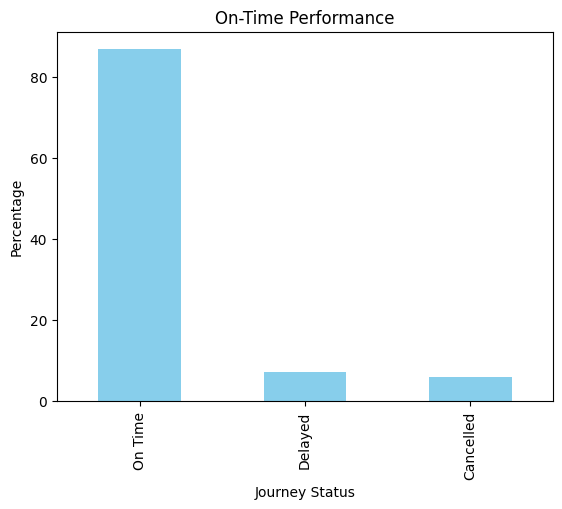

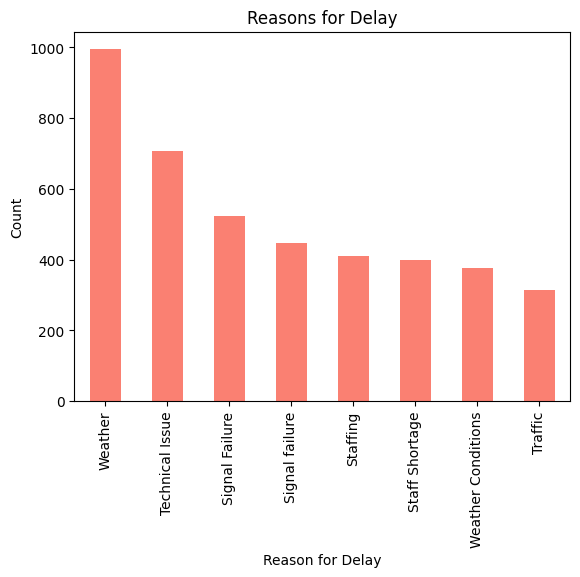

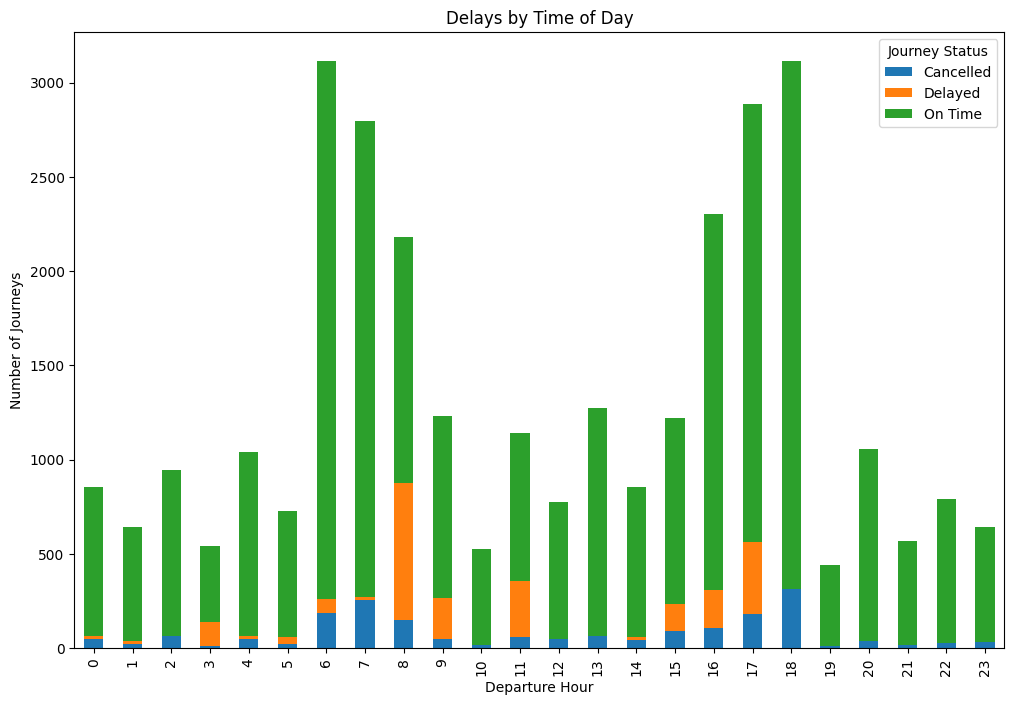

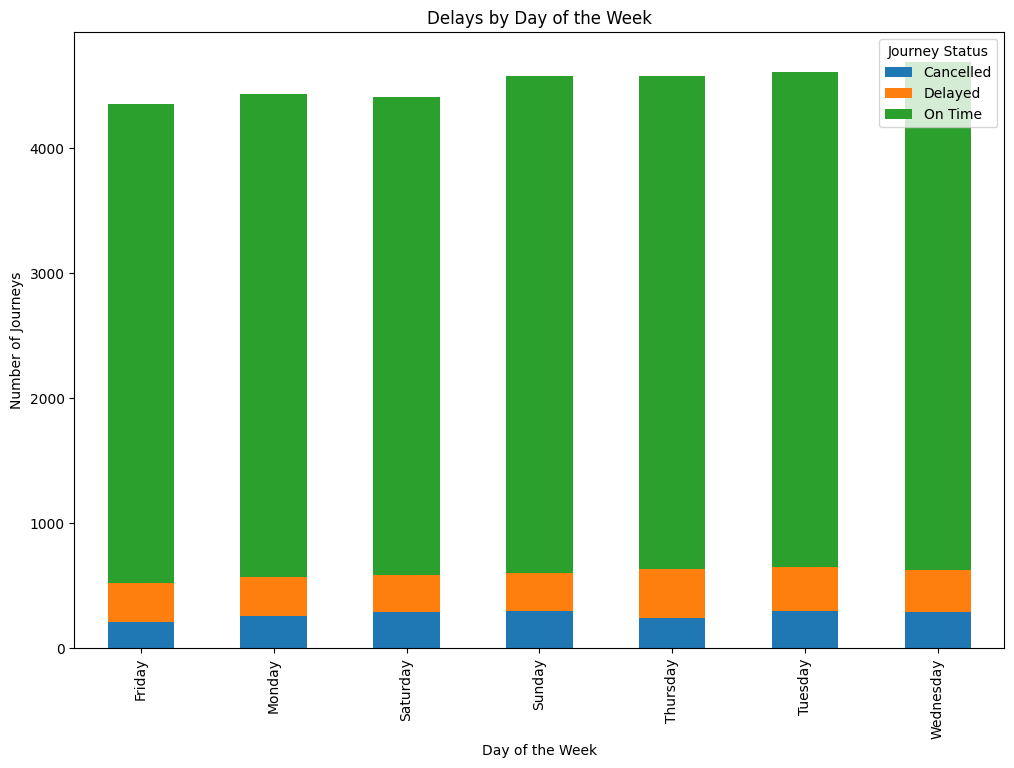

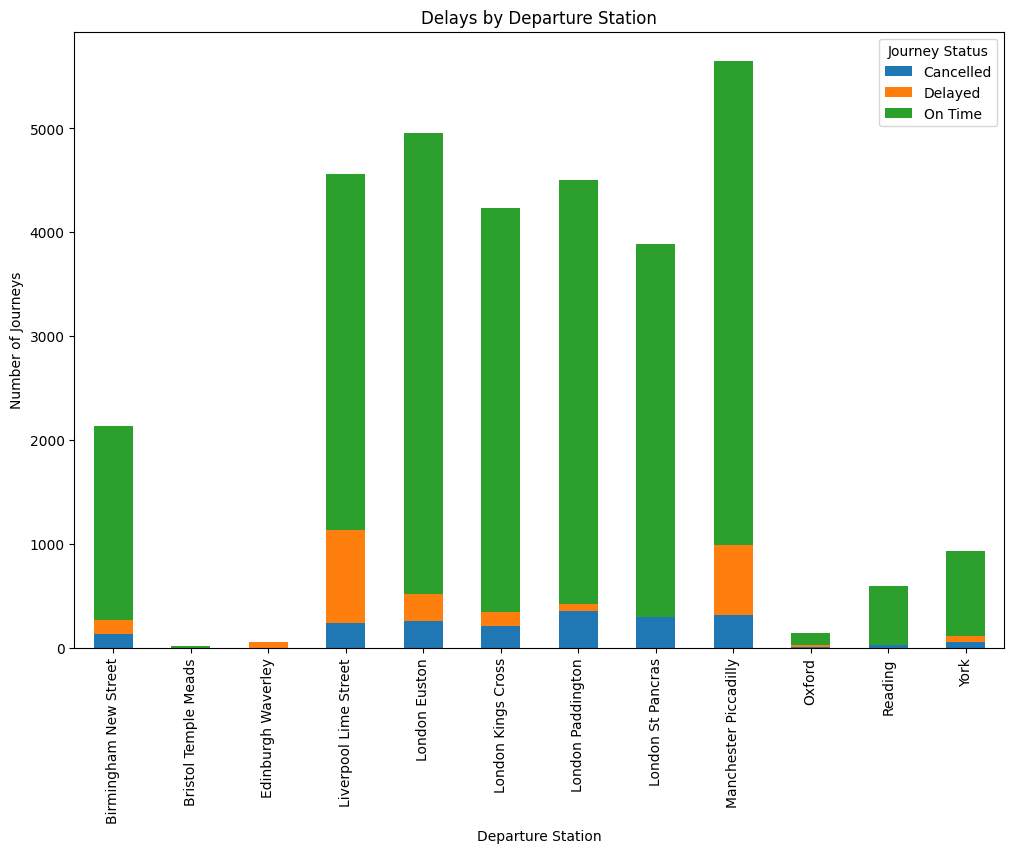

In [46]:


# Plotting on-time performance
on_time_performance.plot(kind='bar', color='skyblue')
plt.xlabel('Journey Status')
plt.ylabel('Percentage')
plt.title('On-Time Performance')
plt.show()

# Plotting reasons for delay
delay_reasons.plot(kind='bar', color='salmon')
plt.xlabel('Reason for Delay')
plt.ylabel('Count')
plt.title('Reasons for Delay')
plt.show()

# Plotting delays by time of day
delays_by_hour.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Departure Hour')
plt.ylabel('Number of Journeys')
plt.title('Delays by Time of Day')
plt.legend(title='Journey Status')
plt.show()

# Plotting delays by day of the week
delays_by_day.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Journeys')
plt.title('Delays by Day of the Week')
plt.legend(title='Journey Status')
plt.show()

# Plotting delays by departure station (optional, may require filtering top stations)
delays_by_station.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Departure Station')
plt.ylabel('Number of Journeys')
plt.title('Delays by Departure Station')
plt.legend(title='Journey Status')
plt.show()
